# This notebook implements the software program: fragments_from_footprinting
Author: Ariana Brenner Clerkin <br>
Date: 2 March 2023

Load appropriate modules

In [1]:
import fragments_from_footprinting as ff

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
#                                'Lucida Grande', 'Verdana']
import matplotlib.pyplot as plt

In [ ]:
# Autosave this each time

In [35]:
example_cp = ff.generate_cleav_prob()

In [ ]:
attempted, actual = ff.get_breaks_to_try(example_cp)

In [ ]:
actual

In [ ]:
1/150. * len(example_cp)

In [ ]:

fraglens, mids = ff.get_fld(cleavage_prob=example_cp, trials = 100, break_rate = 150)

In [ ]:
frags_and_mids = pd.DataFrame({'frag_len': fraglens,
                      'midpoints': mids})
# Autosave this each time
frags_and_mids

In [ ]:
plt.hist(fraglens, bins = 100)

In [ ]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]

In [ ]:
frags_and_mids['bin_mins'] = pd.cut(frags_and_mids['midpoints'], bins=bin_boundaries, labels=bin_labels)
frags_and_mids_subset = frags_and_mids[frags_and_mids['bin_mins'] > 0.0]

In [ ]:
frags_and_mids

In [4]:
data_fold = '/ru-auth/local/home/abrenner/myscratch/temp_footprint/'
frags_and_mids = pd.read_csv(data_fold + "fragment_lens_and_locations.csv")

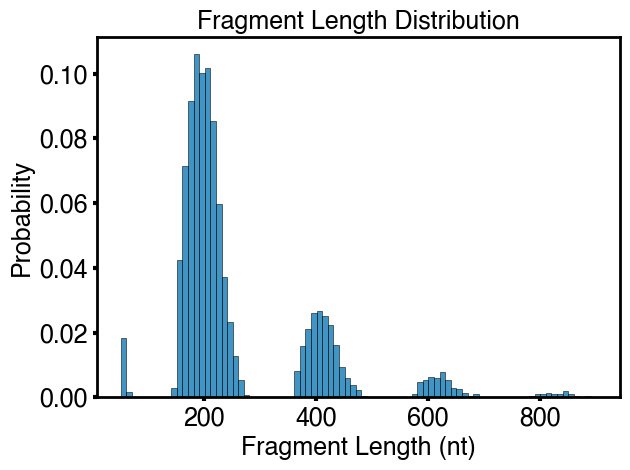

In [5]:
max_y_bin = 1000
min_y = 0#50
data_for_hist = frags_and_mids[frags_and_mids.frag_len<max_y_bin].frag_len
stored_histogram = sns.histplot(data=data_for_hist, binwidth=10, stat= 'probability')
plt.title('Fragment Length Distribution')
plt.xlabel('Fragment Length (nt)')
plt.tight_layout()
plt.savefig(data_fold + 'fld.pdf')
plt.show()

In [6]:
# min_y_range = 0.#50.
# max_y_range = 1000.
# bp_per_bin = 5.
# bin_y_boundaries = list(np.linspace(min_y_range,max_y_range, 1+int((max_y_range-min_y_range)/bp_per_bin)))
# bin_labels = frags_and_mids['bin_mins'].unique()
# # v_plot_empty = np.zeros((len(bin_labels),len(bins[:-1])))
# v_plot_empty = np.zeros((len(bin_labels),len(bin_y_boundaries[:-1])))
# np.shape(v_plot_empty)

# v_plot_empty

# # Iterate through x-bins and grab FLDs per bin
# for i in range(0,np.shape(v_plot_empty)[0]):
#     flds_per_bin = np.array(frags_and_mids[frags_and_mids['bin_mins']==bin_labels[i]].frag_len)
#     print(flds_per_bin)
#     bin_heights, bins, patches = plt.hist(flds_per_bin, bins = bin_y_boundaries);
#     #flipped so it plots in the right order
#     v_plot_empty[i] = np.flip(bin_heights)

In [ ]:
# im = ax[1].imshow(v_plot_empty.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

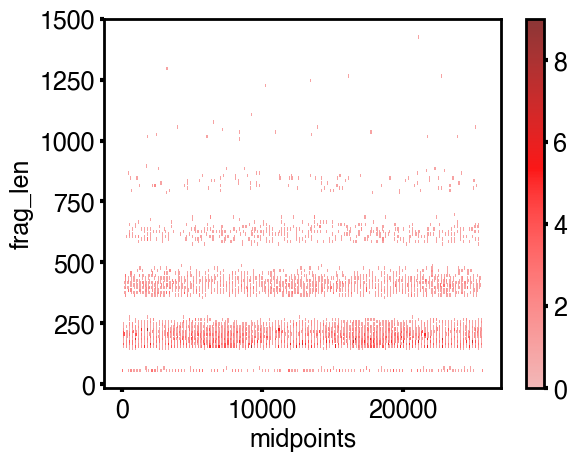

In [57]:
hist2d = sns.histplot(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)

In [55]:
hist2d = sns.heatmap(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)

TypeError: apply() missing 1 required positional argument: 'func'

TypeError: slice indices must be integers or None or have an __index__ method

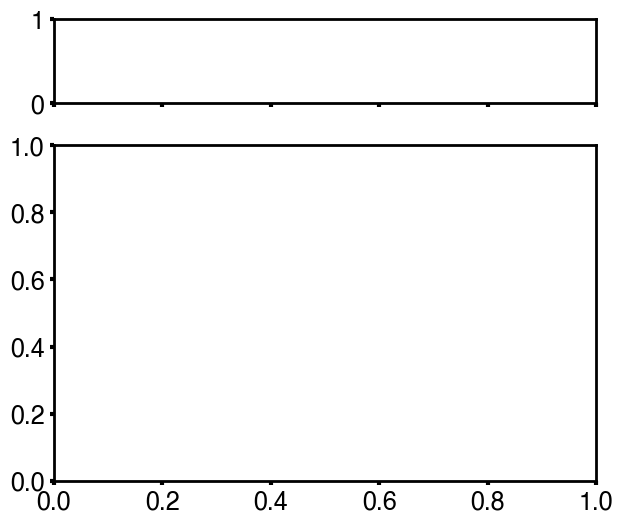

In [38]:
min_range = -1200#50.
max_range = 1200

min_y_range = 0.#50.
max_y_range = 1000.

fig, ax = plt.subplots(2,1,figsize = (7,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
midpoint = len(example_cp)/2
cleavage = ax[0].plot(range(min_range, max_range), example_cp[min_range+midpoint:max_range+midpoint], linewidth=3)
ax[0].set_ylabel('Cleavage \n Prob.')
ax[0].set_xlim((min_range,max_range))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
im = sns.displot(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)
ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
ax[1].set_ylabel('Fragment \n Length (nt)')
plt.tight_layout()

In [21]:
data = sns.facet_data()

AttributeError: module 'seaborn' has no attribute 'facet_data'

In [25]:
# hist2d.figure

for ax in hist2d.axes.flat:
    print (ax.lines)
    for line in ax.lines:
        print (line.get_data())
        print (line.get_data())

[]


In [34]:
cp

cp: missing file operand
Try 'cp --help' for more information.


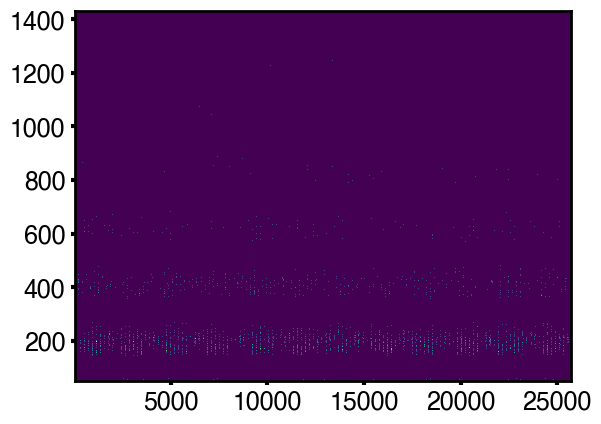

In [78]:
matrix, arr2, a ,b= plt.hist2d(x=frags_and_mids["midpoints"], y=frags_and_mids["frag_len"], bins=[1200,100])#, color = "red", binwidth=(10, 10), cbar=True)

In [83]:
np.shape(matrix)

a = matrix
row_sums = a.sum(axis=1)
new_matrix = a / row_sums[:, np.newaxis]

/tmp/ipykernel_34077/3212759589.py:5: RuntimeWarning: invalid value encountered in divide
  new_matrix = a / row_sums[:, np.newaxis]


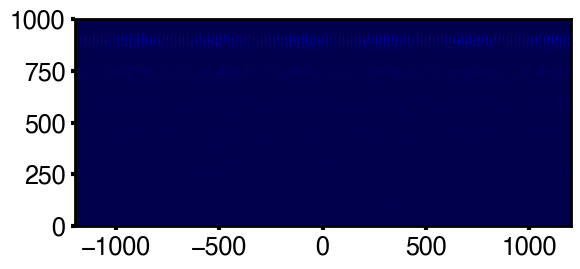

In [85]:
im = plt.imshow(matrix.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

# try with bigger data

In [86]:
intermed_data = '/ru-auth/local/home/abrenner/myscratch/intermed_data/footprinting/vplot_input_'

In [87]:
all_fraglens_dyad_1_0_ld = np.load(intermed_data+'fraglens_simple_dyad.npy')
all_mids = np.load(intermed_data+'simple_dyad_midpoints.npy')

In [88]:
frags_and_mids = pd.DataFrame({'frag_len': all_fraglens_dyad_1_0_ld[0],
                      'midpoints': all_mids[0]-midpoint})

In [97]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]

min_y_range = 0.#50.
max_y_range = 1000.
bp_per_bin = 5.
bin_y_boundaries = list(np.linspace(min_y_range,max_y_range, 1+int((max_y_range-min_y_range)/bp_per_bin)))

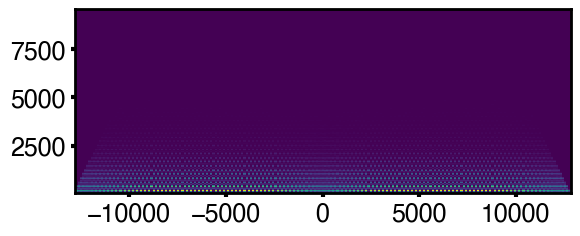

In [98]:
matrix, arr2, a ,b= plt.hist2d(x=frags_and_mids["midpoints"], y=frags_and_mids["frag_len"], bins=[len(bin_labels),len(bin_y_boundaries[:-1])])#, color = "red", binwidth=(10, 10), cbar=True)
im = plt.imshow(matrix.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [90]:
np.shape(matrix)

(1200, 100)

In [115]:
frags_and_mids_new = frags_and_mids[(frags_and_mids.frag_len < 1000) & (np.abs(frags_and_mids.midpoints) < 1200)]

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [20.,  7.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 7.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-1.19850000e+03, -1.18850833e+03, -1.17851667e+03, -1.16852500e+03,
        -1.15853333e+03, -1.14854167e+03, -1.13855000e+03, -1.12855833e+03,
        -1.11856667e+03, -1.10857500e+03, -1.09858333e+03, -1.08859167e+03,
        -1.07860000e+03, -1.06860833e+03, -1.05861667e+03, -1.04862500e+03,
        -1.03863333e+03, -1.02864167e+03, -1.01865000e+03, -1.00865833e+03,
        -9.98666667e+02, -9.88675000e+02, -9.78683333e+02, -9.68691667e+02,
        -9.58700000e+02, -9.48708333e+02, -9.38716667e+02, -9.28725000e+02,
        -9.18733333e+02, -9.08741667e+02, -8.98750000e+02, -8.88758333e+02,
        -8.78766667e+02, -8.68775000e+02, -8.58783333e+02, -8.48791667e+02,
        -8.38800000e+02, -8.288

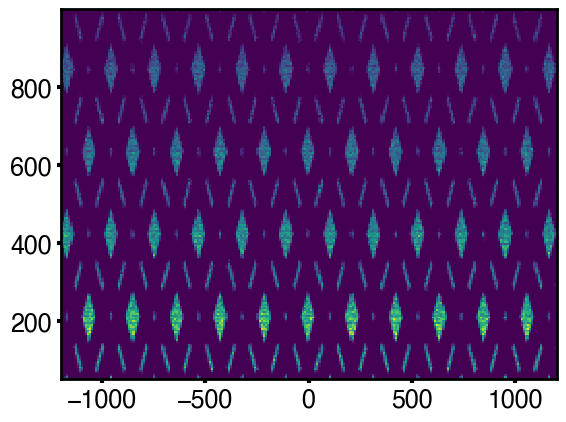

In [116]:
plt.hist2d(x=frags_and_mids_new["midpoints"], y=frags_and_mids_new["frag_len"], bins=[len(bin_labels),len(bin_y_boundaries[:-1])])#, color = "red", binwidth=(10, 10), cbar=True)

In [100]:
frags_and_mids

,frag_len,midpoints
0,447.0,-12396.5
1,1060.0,-11642.5
2,611.0,-10806.5
3,231.0,-10386.5
4,189.0,-10176.5
...,...,...
2991371,311.0,7691.5
2991372,123.0,7907.5
2991373,2280.0,9109.5
2991374,1389.0,10969.5
